# Universidad de Buenos Aires
# Algoritmos evolutivos - TP3
# Octubre 2024

### <font color='violet'>Alumno: Zenklusen, Kevin</font>

Una fábrica produce cuatro tipos de partes automotrices. Cada una de ellas 
primero se fabrica y luego se le dan los acabados. Las horas de trabajador 
requeridas y la utilidad para cada parte son las siguientes

| Parte                                | A   | B   | C    | D   |
|--------------------------------------|-----|-----|------|-----|
| tiempo de fabricación (hr/100 unidades) | 2.5 | 1.5 | 2.75 | 2   |
| tiempo de acabados (hs/100 unidades)   | 3.5 | 3   | 3    | 2   |
| utilidad ($/100 unidades)              | 375 | 275 | 475  | 325 |

Las capacidades de los talleres de fabricación y acabados para el mes siguiente 
son de 640 y 960 horas, respectivamente. Determinar mediante un algoritmo 
PSO con restricciones (sin usar bibliotecas para PSO) que cantidad de cada 
partes debe producirse a fin de maximizar la utilidad y resolver las siguientes 
consignas:
a. (Valor 0.33 puntos) Transcribir el algoritmo escrito en Python a un 
archivo .pdf de acuerdo a los siguientes parámetros: número de 
partículas = 20, máximo número de iteraciones 50, coeficientes de 
aceleración c1 = c2 = 1.4944, factor de inercia w = 0.6.

b. Transcribir la solución óptima encontrada (dominio) y el valor objetivo óptimo (imagen). 


In [26]:
import numpy as np

# Función objetivo a maximizar (utilidad total)
def f(x):
    return 375 * x[0] + 275 * x[1] + 475 * x[2] + 325 * x[3]

# Restricción de tiempo de fabricación
def g1(x):
    return 2.5 * x[0] + 1.5 * x[1] + 2.75 * x[2] + 2 * x[3] <= 640

# Restricción de tiempo de acabados
def g2(x):
    return 3.5 * x[0] + 3 * x[1] + 3 * x[2] + 2 * x[3] <= 960

# Restricción de no negatividad
def g3(x):
    return all(x >= 0)

# Parámetros
n_particles = 20
n_dimensions = 4  # cantidad de partes: A, B, C, D
max_iterations = 50
c1 = c2 = 1.4944
w = 0.6

# Se realiza la búsqueda 20 veces para poder ver distintos posibles resultados
for veces in range(20):
    # Inicialización de partículas
    x = np.zeros((n_particles, n_dimensions))
    v = np.zeros((n_particles, n_dimensions))
    pbest = np.zeros((n_particles, n_dimensions))
    pbest_fit = -np.inf * np.ones(n_particles)
    gbest = np.zeros(n_dimensions)
    gbest_fit = -np.inf

    # Inicialización de partículas factibles
    for i in range(n_particles):
        while True:
            x[i] = np.random.uniform(0, 100, n_dimensions)  # Cantidad en cientos de unidades
            if g1(x[i]) and g2(x[i]) and g3(x[i]):  # Verificar restricciones
                break
        v[i] = np.random.uniform(-1, 1, n_dimensions)
        pbest[i] = x[i].copy()
        fit = f(x[i])
        if fit > pbest_fit[i]:
            pbest_fit[i] = fit

    historial_gbest = []


    # Optimización PSO
    for _ in range(max_iterations):
        for i in range(n_particles):
            fit = f(x[i])
            if fit > pbest_fit[i] and g1(x[i]) and g2(x[i]) and g3(x[i]):
                pbest_fit[i] = fit
                pbest[i] = x[i].copy()
                if fit > gbest_fit:
                    gbest_fit = fit
                    gbest = x[i].copy()

            # Actualización de velocidad y posición
            v[i] = w * v[i] + c1 * np.random.rand() * (pbest[i] - x[i]) + c2 * np.random.rand() * (gbest - x[i])
            x[i] += v[i]

            # Si la nueva posición no cumple las restricciones, revertir a la mejor posición personal
            if not (g1(x[i]) and g2(x[i]) and g3(x[i])):
                x[i] = pbest[i].copy()
        
        historial_gbest.append(gbest_fit)

    # Imprimir los resultados
    print(f"Mejor solución: A = {gbest[0]:.2f}, B = {gbest[1]:.2f}, C = {gbest[2]:.2f}, D = {gbest[3]:.2f}")
    print(f"Utilidad máxima: ${gbest_fit:.2f}")


Mejor solución: A = 0.10, B = 168.33, C = 126.03, D = 20.33
Utilidad máxima: $112801.66
Mejor solución: A = 0.33, B = 185.19, C = 86.87, D = 61.25
Utilidad máxima: $112219.97
Mejor solución: A = 73.38, B = 149.08, C = 72.81, D = 16.35
Utilidad máxima: $108413.39
Mejor solución: A = 5.05, B = 36.92, C = 148.53, D = 81.77
Utilidad máxima: $109173.10
Mejor solución: A = 100.51, B = 96.37, C = 49.88, D = 53.50
Utilidad máxima: $105273.36
Mejor solución: A = 83.05, B = 90.58, C = 77.21, D = 42.08
Utilidad máxima: $106406.76
Mejor solución: A = 84.98, B = 45.89, C = 86.22, D = 60.80
Utilidad máxima: $105203.19
Mejor solución: A = 43.99, B = 37.74, C = 101.11, D = 97.68
Utilidad máxima: $106648.39
Mejor solución: A = 70.94, B = 87.99, C = 26.88, D = 128.36
Utilidad máxima: $105288.85
Mejor solución: A = 0.00, B = 148.45, C = 84.30, D = 92.41
Utilidad máxima: $110901.10
Mejor solución: A = 50.52, B = 59.75, C = 154.15, D = 0.00
Utilidad máxima: $108600.46
Mejor solución: A = 60.79, B = 81.88, 

d. Realizar un gráfico de línea que muestre gbest (eje de ordenadas) en función de las iteraciones realizadas (eje de abscisas). El gráfico debe contener etiquetas en los ejes, leyenda y un título.

Se realizan múltiples ejecuciones ya que los valores varían y se pretende conocer un rango de las posibles soluciones óptimas.
Vemos valores que varían entre $112800 y $105000

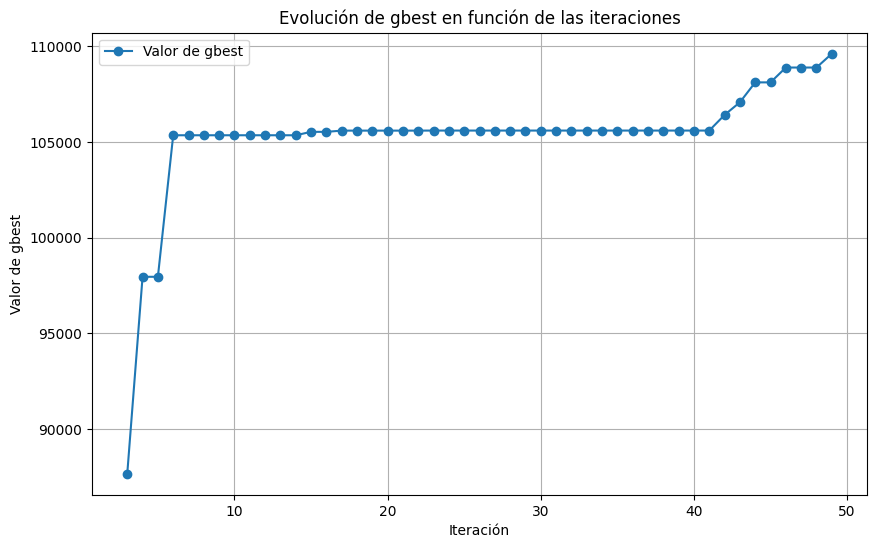

In [6]:
import matplotlib.pyplot as plt

# Gráfico de evolución de gbest
plt.figure(figsize=(10, 6))
plt.plot(historial_gbest, marker='o', label='Valor de gbest')
plt.title('Evolución de gbest en función de las iteraciones')
plt.xlabel('Iteración')
plt.ylabel('Valor de gbest')
plt.legend()
plt.grid(True)
plt.show()

e. Explicar y demostrar (desde el código fuente) que sucede si se reduce en 1 unidad el tiempo de acabado de la parte B. 


In [27]:
import numpy as np

# Función objetivo a maximizar (utilidad total)
def f(x):
    return 375 * x[0] + 275 * x[1] + 475 * x[2] + 325 * x[3]

# Restricción de tiempo de fabricación
def g1(x):
    return 2.5 * x[0] + 1.5 * x[1] + 2.75 * x[2] + 2 * x[3] <= 640

# Restricción de tiempo de acabados
def g2(x):
    return 3.5 * x[0] + 2 * x[1] + 3 * x[2] + 2 * x[3] <= 960

# Restricción de no negatividad
def g3(x):
    return all(x >= 0)

# Parámetros
n_particles = 20
n_dimensions = 4  # cantidad de partes: A, B, C, D
max_iterations = 50
c1 = c2 = 1.4944
w = 0.6

for veces in range(20):
    # Inicialización de partículas
    x = np.zeros((n_particles, n_dimensions))
    v = np.zeros((n_particles, n_dimensions))
    pbest = np.zeros((n_particles, n_dimensions))
    pbest_fit = -np.inf * np.ones(n_particles)
    gbest = np.zeros(n_dimensions)
    gbest_fit = -np.inf

    # Inicialización de partículas factibles
    for i in range(n_particles):
        while True:
            x[i] = np.random.uniform(0, 100, n_dimensions)  # Cantidad en cientos de unidades
            if g1(x[i]) and g2(x[i]) and g3(x[i]):  # Verificar restricciones
                break
        v[i] = np.random.uniform(-1, 1, n_dimensions)
        pbest[i] = x[i].copy()
        fit = f(x[i])
        if fit > pbest_fit[i]:
            pbest_fit[i] = fit

    historial_gbest = []

    # Optimización PSO
    for _ in range(max_iterations):
        for i in range(n_particles):
            fit = f(x[i])
            if fit > pbest_fit[i] and g1(x[i]) and g2(x[i]) and g3(x[i]):
                pbest_fit[i] = fit
                pbest[i] = x[i].copy()
                if fit > gbest_fit:
                    gbest_fit = fit
                    gbest = x[i].copy()

            # Actualización de velocidad y posición
            v[i] = w * v[i] + c1 * np.random.rand() * (pbest[i] - x[i]) + c2 * np.random.rand() * (gbest - x[i])
            x[i] += v[i]

            # Si la nueva posición no cumple las restricciones, revertir a la mejor posición personal
            if not (g1(x[i]) and g2(x[i]) and g3(x[i])):
                x[i] = pbest[i].copy()
        
        historial_gbest.append(gbest_fit)

    # Imprimir los resultados
    print(f"Mejor solución: A = {gbest[0]:.2f}, B = {gbest[1]:.2f}, C = {gbest[2]:.2f}, D = {gbest[3]:.2f}")
    print(f"Utilidad máxima: ${gbest_fit:.2f}")


Mejor solución: A = 111.98, B = 28.31, C = 65.39, D = 68.88
Utilidad máxima: $103224.26
Mejor solución: A = 86.09, B = 128.49, C = 63.89, D = 28.17
Utilidad máxima: $107122.04
Mejor solución: A = 92.61, B = 248.63, C = 12.92, D = 0.00
Utilidad máxima: $109237.74
Mejor solución: A = 84.41, B = 127.90, C = 85.84, D = 0.00
Utilidad máxima: $107598.47
Mejor solución: A = 90.98, B = 93.28, C = 36.49, D = 86.13
Utilidad máxima: $105098.12
Mejor solución: A = 123.10, B = 88.02, C = 63.58, D = 12.68
Utilidad máxima: $104691.97
Mejor solución: A = 18.29, B = 43.96, C = 98.34, D = 128.95
Utilidad máxima: $107568.03
Mejor solución: A = 73.57, B = 29.09, C = 108.94, D = 56.43
Utilidad máxima: $105674.05
Mejor solución: A = 42.86, B = 65.36, C = 104.42, D = 73.82
Utilidad máxima: $107639.83
Mejor solución: A = 64.99, B = 98.74, C = 119.03, D = 0.00
Utilidad máxima: $108062.23
Mejor solución: A = 107.28, B = 46.18, C = 33.09, D = 105.76
Utilidad máxima: $103021.21
Mejor solución: A = 59.61, B = 90.9

Nuevamente se realizan múltiples ejecuciones ya que los valores varían y se pretende conocer un rango de las posibles soluciones óptimas.
Ahora vemos valores que varían entre $110000 y $101000, lo que implica que al reducir en una unidad la capacidad de trabajo de acabado de la pieza B, repercute en los valores máximos posibles.

f. Realizar 3 boxplots a partir de los gbest de 3 variantes de solución: i) El primer boxplot con el coeficiente de inercia constante w = 0.8, ii) El segundo boxplot con el coeficiente de inercia dinámico lineal y iii) El tercer boxplot sin coeficiente de inercia pero aplicando Factor de constricción con φ a elección. 


Mejor solución: A = 40.62, B = 105.33, C = 53.74, D = 116.33
Utilidad máxima: $107533.42
Mejor solución: A = 0.22, B = 41.22, C = 191.17, D = 25.95
Utilidad máxima: $110657.36
Mejor solución: A = 72.84, B = 96.50, C = 97.07, D = 15.55
Utilidad máxima: $105010.73


C:\Users\Windows\AppData\Local\Temp\ipykernel_11600\704082570.py:170: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([historial_gbest_w_08, historial_gbest_w_dim, historial_gbest_constric],


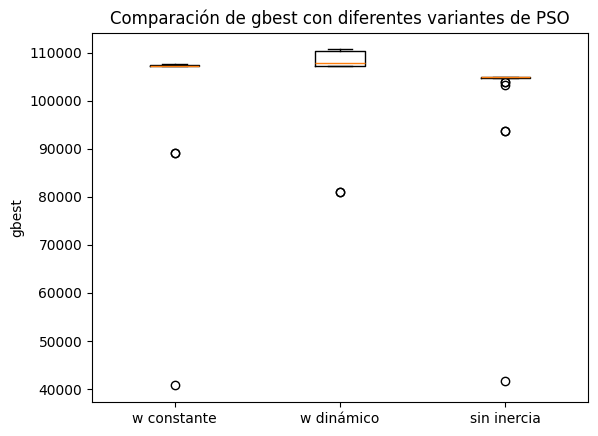

In [29]:
import numpy as np

# Función objetivo a maximizar (utilidad total)
def f(x):
    return 375 * x[0] + 275 * x[1] + 475 * x[2] + 325 * x[3]

# Restricción de tiempo de fabricación
def g1(x):
    return 2.5 * x[0] + 1.5 * x[1] + 2.75 * x[2] + 2 * x[3] <= 640

# Restricción de tiempo de acabados
def g2(x):
    return 3.5 * x[0] + 3 * x[1] + 3 * x[2] + 2 * x[3] <= 960

# Restricción de no negatividad
def g3(x):
    return all(x >= 0)

# Parámetros
n_particles = 20
n_dimensions = 4  # cantidad de partes: A, B, C, D
max_iterations = 50
c1 = c2 = 1.4944
w = 0.8
w_max = 0.9  # valor inicial del coeficiente de inercia
w_min = 0.4  # valor final del coeficiente de inercia
phi = 4.1
chi = 2 / abs(2 - phi - np.sqrt(phi**2 - 4*phi))

historial_gbest_w_08 = []
historial_gbest_w_dim = []
historial_gbest_constric = []

# Inicialización de partículas
x = np.zeros((n_particles, n_dimensions))
v = np.zeros((n_particles, n_dimensions))
pbest = np.zeros((n_particles, n_dimensions))
pbest_fit = -np.inf * np.ones(n_particles)
gbest = np.zeros(n_dimensions)
gbest_fit = -np.inf

# Inicialización de partículas factibles
for i in range(n_particles):
    while True:
        x[i] = np.random.uniform(0, 100, n_dimensions)  # Cantidad en cientos de unidades
        if g1(x[i]) and g2(x[i]) and g3(x[i]):  # Verificar restricciones
            break
    v[i] = np.random.uniform(-1, 1, n_dimensions)
    pbest[i] = x[i].copy()
    fit = f(x[i])
    if fit > pbest_fit[i]:
        pbest_fit[i] = fit

# Optimización PSO
for _ in range(max_iterations):
    for i in range(n_particles):
        fit = f(x[i])
        if fit > pbest_fit[i] and g1(x[i]) and g2(x[i]) and g3(x[i]):
            pbest_fit[i] = fit
            pbest[i] = x[i].copy()
            if fit > gbest_fit:
                gbest_fit = fit
                gbest = x[i].copy()

        # Actualización de velocidad y posición
        v[i] = w * v[i] + c1 * np.random.rand() * (pbest[i] - x[i]) + c2 * np.random.rand() * (gbest - x[i])
        x[i] += v[i]

        # Si la nueva posición no cumple las restricciones, revertir a la mejor posición personal
        if not (g1(x[i]) and g2(x[i]) and g3(x[i])):
            x[i] = pbest[i].copy()
    
    historial_gbest_w_08.append(gbest_fit)

# Imprimir los resultados
print(f"Mejor solución: A = {gbest[0]:.2f}, B = {gbest[1]:.2f}, C = {gbest[2]:.2f}, D = {gbest[3]:.2f}")
print(f"Utilidad máxima: ${gbest_fit:.2f}")

# Inicialización de partículas
x = np.zeros((n_particles, n_dimensions))
v = np.zeros((n_particles, n_dimensions))
pbest = np.zeros((n_particles, n_dimensions))
pbest_fit = -np.inf * np.ones(n_particles)
gbest = np.zeros(n_dimensions)
gbest_fit = -np.inf

# Inicialización de partículas factibles
for i in range(n_particles):
    while True:
        x[i] = np.random.uniform(0, 100, n_dimensions)  # Cantidad en cientos de unidades
        if g1(x[i]) and g2(x[i]) and g3(x[i]):  # Verificar restricciones
            break
    v[i] = np.random.uniform(-1, 1, n_dimensions)
    pbest[i] = x[i].copy()
    fit = f(x[i])
    if fit > pbest_fit[i]:
        pbest_fit[i] = fit

# Optimización PSO
for iter in range(max_iterations):
    w = w_max - (w_max - w_min) * (iter / max_iterations)
    for i in range(n_particles):
        fit = f(x[i])
        if fit > pbest_fit[i] and g1(x[i]) and g2(x[i]) and g3(x[i]):
            pbest_fit[i] = fit
            pbest[i] = x[i].copy()
            if fit > gbest_fit:
                gbest_fit = fit
                gbest = x[i].copy()

        # Actualización de velocidad y posición
        v[i] = w * v[i] + c1 * np.random.rand() * (pbest[i] - x[i]) + c2 * np.random.rand() * (gbest - x[i])
        x[i] += v[i]

        # Si la nueva posición no cumple las restricciones, revertir a la mejor posición personal
        if not (g1(x[i]) and g2(x[i]) and g3(x[i])):
            x[i] = pbest[i].copy()
    
    historial_gbest_w_dim.append(gbest_fit)

# Imprimir los resultados
print(f"Mejor solución: A = {gbest[0]:.2f}, B = {gbest[1]:.2f}, C = {gbest[2]:.2f}, D = {gbest[3]:.2f}")
print(f"Utilidad máxima: ${gbest_fit:.2f}")

# Inicialización de partículas
x = np.zeros((n_particles, n_dimensions))
v = np.zeros((n_particles, n_dimensions))
pbest = np.zeros((n_particles, n_dimensions))
pbest_fit = -np.inf * np.ones(n_particles)
gbest = np.zeros(n_dimensions)
gbest_fit = -np.inf

# Inicialización de partículas factibles
for i in range(n_particles):
    while True:
        x[i] = np.random.uniform(0, 100, n_dimensions)  # Cantidad en cientos de unidades
        if g1(x[i]) and g2(x[i]) and g3(x[i]):  # Verificar restricciones
            break
    v[i] = np.random.uniform(-1, 1, n_dimensions)
    pbest[i] = x[i].copy()
    fit = f(x[i])
    if fit > pbest_fit[i]:
        pbest_fit[i] = fit

# Optimización PSO
for _ in range(max_iterations):
    for i in range(n_particles):
        fit = f(x[i])
        if fit > pbest_fit[i] and g1(x[i]) and g2(x[i]) and g3(x[i]):
            pbest_fit[i] = fit
            pbest[i] = x[i].copy()
            if fit > gbest_fit:
                gbest_fit = fit
                gbest = x[i].copy()

        # Actualización de velocidad y posición
        v[i] = chi * (c1 * np.random.rand() * (pbest[i] - x[i]) + c2 * np.random.rand() * (gbest - x[i]))
        x[i] += v[i]

        # Si la nueva posición no cumple las restricciones, revertir a la mejor posición personal
        if not (g1(x[i]) and g2(x[i]) and g3(x[i])):
            x[i] = pbest[i].copy()
    
    historial_gbest_constric.append(gbest_fit)

# Imprimir los resultados
print(f"Mejor solución: A = {gbest[0]:.2f}, B = {gbest[1]:.2f}, C = {gbest[2]:.2f}, D = {gbest[3]:.2f}")
print(f"Utilidad máxima: ${gbest_fit:.2f}")

plt.boxplot([historial_gbest_w_08, historial_gbest_w_dim, historial_gbest_constric],
            labels=["w constante", "w dinámico", "sin inercia"])
plt.title("Comparación de gbest con diferentes variantes de PSO")
plt.ylabel("gbest")
plt.show()

g. Realizar observaciones/comentarios/conclusiones acerca de los resultados del ítem (f). 


Variante con coeficiente de inercia constante (w constante):

Los valores de gbest obtenidos son bastante consistentes, con una baja dispersión, lo que indica que el algoritmo es estable. Sin embargo, hay algunas ejecuciones que quedaron fuera del rango óptimo (outliers), lo que sugiere que el enfoque con inercia constante puede quedarse atrapado en soluciones subóptimas o tener problemas de exploración en algunos casos.

Variante con coeficiente de inercia dinámico (w dinámico):

Esta variante muestra una mayor dispersión en los resultados en comparación con la inercia constante. La caja es más amplia, lo que indica que el gbest varía más entre ejecuciones. Esto puede sugerir que la inercia dinámica mejora la capacidad del PSO para explorar diferentes soluciones, permitiendo que se alcance un rango más amplio de valores óptimos. Sin embargo, hay algunos outliers que están por debajo del rango principal, lo que indica que en algunas ocasiones el ajuste dinámico no lleva al mejor rendimiento.

Variante sin inercia (con factor de constricción):

Al igual que la variante con inercia constante, esta opción presenta una baja dispersión en sus resultados, mostrando una gran estabilidad. Aunque parece funcionar de manera similar al método de inercia constante en cuanto a consistencia, también se observan ejecuciones con resultados significativamente peores (outliers), lo que indica que puede haber casos en los que el factor de constricción sin inercia no permita explorar adecuadamente el espacio de soluciones.

h. Realizar observaciones/comentarios/conclusiones acerca de qué cantidad mínima de partículas es factible utilizar para este problema específicamente. 

In [92]:
# Parámetros
n_dimensions = 4  # cantidad de partes: A, B, C, D
max_iterations = 50
c1 = c2 = 1.4944
w = 0.6

resultados_optimos = []

# Se realiza la búsqueda 30 veces aumentando el número de partículas en 1 en cada iteración
for n_particles in range(40):
    # Inicialización de partículas
    x = np.zeros((n_particles, n_dimensions))
    v = np.zeros((n_particles, n_dimensions))
    pbest = np.zeros((n_particles, n_dimensions))
    pbest_fit = -np.inf * np.ones(n_particles)
    gbest = np.zeros(n_dimensions)
    gbest_fit = -np.inf

    # Inicialización de partículas factibles
    for i in range(n_particles):
        while True:
            x[i] = np.random.uniform(0, 100, n_dimensions)  # Cantidad en cientos de unidades
            if g1(x[i]) and g2(x[i]) and g3(x[i]):  # Verificar restricciones
                break
        v[i] = np.random.uniform(-1, 1, n_dimensions)
        pbest[i] = x[i].copy()
        fit = f(x[i])
        if fit > pbest_fit[i]:
            pbest_fit[i] = fit


    # Optimización PSO
    for _ in range(max_iterations):
        for i in range(n_particles):
            fit = f(x[i])
            if fit > pbest_fit[i] and g1(x[i]) and g2(x[i]) and g3(x[i]):
                pbest_fit[i] = fit
                pbest[i] = x[i].copy()
                if fit > gbest_fit:
                    gbest_fit = fit
                    gbest = x[i].copy()

            # Actualización de velocidad y posición
            v[i] = w * v[i] + c1 * np.random.rand() * (pbest[i] - x[i]) + c2 * np.random.rand() * (gbest - x[i])
            x[i] += v[i]

            # Si la nueva posición no cumple las restricciones, revertir a la mejor posición personal
            if not (g1(x[i]) and g2(x[i]) and g3(x[i])):
                x[i] = pbest[i].copy()

    # Imprimir los resultados
    print(f"Mejor solución: A = {gbest[0]:.2f}, B = {gbest[1]:.2f}, C = {gbest[2]:.2f}, D = {gbest[3]:.2f}")
    print(f"Utilidad máxima: ${gbest_fit:.2f}")
    resultados_optimos.append(gbest_fit) 

Mejor solución: A = 0.00, B = 0.00, C = 0.00, D = 0.00
Utilidad máxima: $-inf
Mejor solución: A = 86.62, B = 116.82, C = 56.00, D = 47.12
Utilidad máxima: $106518.65
Mejor solución: A = 3.19, B = 97.19, C = 161.19, D = 21.50
Utilidad máxima: $111470.94
Mejor solución: A = 0.00, B = 0.00, C = 0.00, D = 0.00
Utilidad máxima: $-inf
Mejor solución: A = 121.10, B = 58.41, C = 85.13, D = 7.76
Utilidad máxima: $104435.24
Mejor solución: A = 22.72, B = 52.97, C = 92.97, D = 124.04
Utilidad máxima: $107560.27
Mejor solución: A = 21.12, B = 200.00, C = 6.63, D = 133.09
Utilidad máxima: $109325.29
Mejor solución: A = 81.77, B = 32.70, C = 115.74, D = 34.12
Utilidad máxima: $105721.82
Mejor solución: A = 104.09, B = 94.26, C = 13.65, D = 100.41
Utilidad máxima: $104076.92
Mejor solución: A = 72.66, B = 19.07, C = 90.43, D = 90.53
Utilidad máxima: $104868.83
Mejor solución: A = 33.13, B = 66.17, C = 49.99, D = 160.22
Utilidad máxima: $106438.26
Mejor solución: A = 100.42, B = 69.90, C = 79.33, D = 

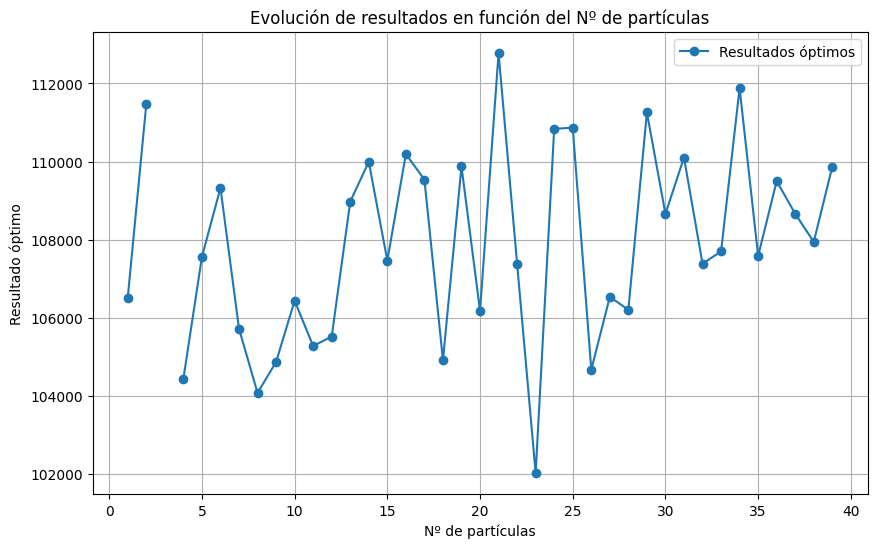

In [93]:
import matplotlib.pyplot as plt

# Gráfico de evolución de resultados en función del número de partículas
plt.figure(figsize=(10, 6))
plt.plot(resultados_optimos, marker='o', label='Resultados óptimos')
plt.title('Evolución de resultados en función del Nº de partículas')
plt.xlabel('Nº de partículas')
plt.ylabel('Resultado óptimo')
plt.legend()
plt.grid(True)
plt.show()

## Ejercicio 2

Un fabricante de equipos de cómputo produce dos tipos de impresoras (impresoras de tipo 1 e impresoras de tipo 2). Los recursos necesarios para producirlas así como las utilidades correspondientes son los que siguen

| Equipo       | Capital ($/unidad) | Mano de obra (hs/unidad) | Utilidad ($/unidad) |
|--------------|---------------------|--------------------------|---------------------|
| Impresora 1  | 300                 | 20                       | 500                 |
| Impresora 2  | 400                 | 10                       | 400                 |

Si cada día se dispone de $127000 de capital y 4270 horas de mano de obra, ¿qué cantidad de cada equipo debe producirse a diario a fin de maximizar la utilidad? Escriba el algoritmo PSO con restricciones (sin usar bibliotecas para PSO) que permita optimizar la utilidad y resolver cumpliendo con las siguientes consignas:
 
a. Transcribir el algoritmo escrito en Python a un archivo .pdf de acuerdo a los siguientes parámetros: número de partículas = 10, máximo número de iteraciones 80, coeficientes de aceleración c1 = c2 = 2, factor de inercia w = 0.5. 

b. Transcribir al .pdf la solución óptima encontrada (dominio) y el valor objetivo óptimo (imagen). 


In [105]:
import numpy as np

# Función objetivo a maximizar: utilidad total
def f(x):
    return 500 * x[0] + 400 * x[1]

# Restricción de capital: 300x1 + 400x2 <= 127000
def g1(x):
    return 300 * x[0] + 400 * x[1] <= 127000

# Restricción de mano de obra: 20x1 + 10x2 <= 4270
def g2(x):
    return 20 * x[0] + 10 * x[1] <= 4270

# Restricción de no negatividad
def g3(x):
    return all(x >= 0)

# Parámetros
n_particles = 10  # Número de partículas
n_dimensions = 2  # Dos dimensiones: cantidad de impresoras de tipo 1 y 2
max_iterations = 80  # Número máximo de iteraciones
c1 = c2 = 2  # Coeficientes de aceleración
w = 0.5  # Factor de inercia

# Inicialización de partículas
x = np.zeros((n_particles, n_dimensions))  # Matriz de posiciones de partículas
v = np.zeros((n_particles, n_dimensions))  # Matriz de velocidades de partículas
pbest = np.zeros((n_particles, n_dimensions))  # Mejores valores personales
pbest_fit = -np.inf * np.ones(n_particles)  # Mejores aptitudes personales
gbest = np.zeros(n_dimensions)  # Mejor solución global
gbest_fit = -np.inf  # Mejor aptitud global

# Inicialización de partículas factibles
for i in range(n_particles):
    while True:  # Asegurar que la partícula sea factible
        x[i] = np.random.uniform(0, 100, n_dimensions)  # Posiciones aleatorias iniciales
        if g1(x[i]) and g2(x[i]) and g3(x[i]):  # Verificar que cumpla las restricciones
            break
    v[i] = np.random.uniform(-1, 1, n_dimensions)  # Velocidad aleatoria
    pbest[i] = x[i].copy()  # Mejor valor personal inicial
    fit = f(x[i])  # Calcular aptitud inicial
    if fit > pbest_fit[i]:
        pbest_fit[i] = fit

historial_gbest = []

# Optimización PSO
for _ in range(max_iterations):
    for i in range(n_particles):
        fit = f(x[i])  # Calcular aptitud actual
        # Verificar si es la mejor aptitud y cumple las restricciones
        if fit > pbest_fit[i] and g1(x[i]) and g2(x[i]):
            pbest_fit[i] = fit  # Actualizar mejor aptitud personal
            pbest[i] = x[i].copy()  # Actualizar mejor posición personal
            if fit > gbest_fit:  # Si es mejor que la global
                gbest_fit = fit  # Actualizar mejor aptitud global
                gbest = x[i].copy()  # Actualizar mejor posición global

        # Actualización de velocidad
        v[i] = (w * v[i] + 
                c1 * np.random.rand() * (pbest[i] - x[i]) + 
                c2 * np.random.rand() * (gbest - x[i]))
        x[i] += v[i]  # Actualización de posición

        # Verificar si la nueva posición es factible
        if not (g1(x[i]) and g2(x[i]) and g3(x[i])):
            x[i] = pbest[i].copy()  # Revertir si no es válida
    
    historial_gbest.append(gbest_fit)

# Resultado final
print(f"Mejor solución: Impresora 1 = {gbest[0]:.4f}, Impresora 2 = {gbest[1]:.4f}")
print(f"Utilidad máxima: {gbest_fit:.4f}")

Mejor solución: Impresora 1 = 88.0398, Impresora 2 = 250.9204
Utilidad máxima: 144388.0664


d. Realizar un gráfico de línea que muestre gbest (eje de ordenadas) en función de las iteraciones realizadas (eje de abscisas). El gráfico debe contener etiquetas en los ejes, leyenda y un título.


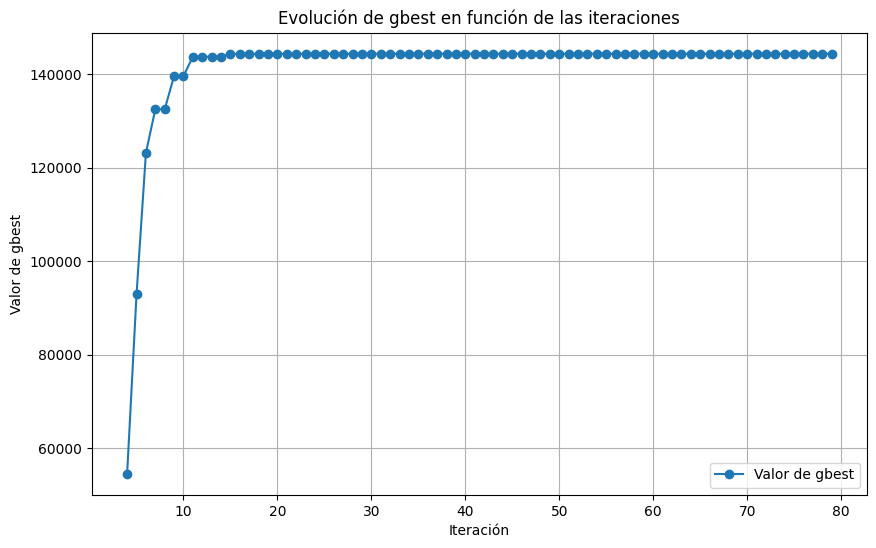

In [106]:
import matplotlib.pyplot as plt

# Gráfico de evolución de gbest
plt.figure(figsize=(10, 6))
plt.plot(historial_gbest, marker='o', label='Valor de gbest')
plt.title('Evolución de gbest en función de las iteraciones')
plt.xlabel('Iteración')
plt.ylabel('Valor de gbest')
plt.legend()
plt.grid(True)
plt.show()

e. Realizar 3 boxplots a partir de los gbest de 3 variantes de solución: i) El primer boxplot con el coeficiente de inercia constante w = 0.9, ii) El segundo boxplot con el coeficiente de inercia dinámico lineal y iii) El tercer boxplot sin coeficiente de inercia pero aplicando Factor de constricción con φ = 5. 

Mejor solución: Impresora 1 = 211.5783, Impresora 2 = 3.8252
Utilidad máxima: 107319.2071
Mejor solución: Impresora 1 = 194.3377, Impresora 2 = 38.3246
Utilidad máxima: 112498.6924
Mejor solución: Impresora 1 = 85.4962, Impresora 2 = 99.7391
Utilidad máxima: 82643.7659


C:\Users\Windows\AppData\Local\Temp\ipykernel_11600\2702724624.py:183: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([historial_gbest_w_09, historial_gbest_w_dim, historial_gbest_constric],


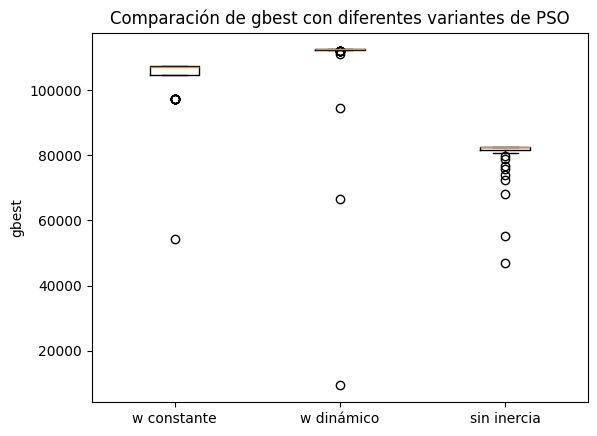

In [202]:
import numpy as np

# Función objetivo a maximizar: utilidad total
def f(x):
    return 500 * x[0] + 400 * x[1]

# Restricción de capital: 300x1 + 400x2 <= 127000
def g1(x):
    return 300 * x[0] + 400 * x[1] <= 127000

# Restricción de mano de obra: 20x1 + 10x2 <= 4270
def g2(x):
    return 20 * x[0] + 10 * x[1] <= 4270

# Restricción de no negatividad
def g3(x):
    return all(x >= 0)

# Parámetros
n_particles = 10  # Número de partículas
n_dimensions = 2  # Dos dimensiones: cantidad de impresoras de tipo 1 y 2
max_iterations = 80  # Número máximo de iteraciones
c1 = c2 = 2  # Coeficientes de aceleración
w = 0.9
w_max = 0.9  # valor inicial del coeficiente de inercia
w_min = 0.4  # valor final del coeficiente de inercia
phi = 5
chi = 2 / abs(2 - phi - np.sqrt(phi**2 - 4*phi))

historial_gbest_w_09 = []
historial_gbest_w_dim = []
historial_gbest_constric = []

# Inicialización de partículas
x = np.zeros((n_particles, n_dimensions))  # Matriz de posiciones de partículas
v = np.zeros((n_particles, n_dimensions))  # Matriz de velocidades de partículas
pbest = np.zeros((n_particles, n_dimensions))  # Mejores valores personales
pbest_fit = -np.inf * np.ones(n_particles)  # Mejores aptitudes personales
gbest = np.zeros(n_dimensions)  # Mejor solución global
gbest_fit = -np.inf  # Mejor aptitud global

# Inicialización de partículas factibles
for i in range(n_particles):
    while True:  # Asegurar que la partícula sea factible
        x[i] = np.random.uniform(0, 100, n_dimensions)  # Posiciones aleatorias iniciales
        if g1(x[i]) and g2(x[i]) and g3(x[i]):  # Verificar que cumpla las restricciones
            break
    v[i] = np.random.uniform(-1, 1, n_dimensions)  # Velocidad aleatoria
    pbest[i] = x[i].copy()  # Mejor valor personal inicial
    fit = f(x[i])  # Calcular aptitud inicial
    if fit > pbest_fit[i]:
        pbest_fit[i] = fit

# Optimización PSO
for _ in range(max_iterations):
    for i in range(n_particles):
        fit = f(x[i])  # Calcular aptitud actual
        # Verificar si es la mejor aptitud y cumple las restricciones
        if fit > pbest_fit[i] and g1(x[i]) and g2(x[i]):
            pbest_fit[i] = fit  # Actualizar mejor aptitud personal
            pbest[i] = x[i].copy()  # Actualizar mejor posición personal
            if fit > gbest_fit:  # Si es mejor que la global
                gbest_fit = fit  # Actualizar mejor aptitud global
                gbest = x[i].copy()  # Actualizar mejor posición global

        # Actualización de velocidad
        v[i] = (w * v[i] + 
                c1 * np.random.rand() * (pbest[i] - x[i]) + 
                c2 * np.random.rand() * (gbest - x[i]))
        x[i] += v[i]  # Actualización de posición

        # Verificar si la nueva posición es factible
        if not (g1(x[i]) and g2(x[i]) and g3(x[i])):
            x[i] = pbest[i].copy()  # Revertir si no es válida

    historial_gbest_w_09.append(gbest_fit)
    

# Resultado final
print(f"Mejor solución: Impresora 1 = {gbest[0]:.4f}, Impresora 2 = {gbest[1]:.4f}")
print(f"Utilidad máxima: {gbest_fit:.4f}")

# Inicialización de partículas
x = np.zeros((n_particles, n_dimensions))  # Matriz de posiciones de partículas
v = np.zeros((n_particles, n_dimensions))  # Matriz de velocidades de partículas
pbest = np.zeros((n_particles, n_dimensions))  # Mejores valores personales
pbest_fit = -np.inf * np.ones(n_particles)  # Mejores aptitudes personales
gbest = np.zeros(n_dimensions)  # Mejor solución global
gbest_fit = -np.inf  # Mejor aptitud global

# Inicialización de partículas factibles
for i in range(n_particles):
    while True:  # Asegurar que la partícula sea factible
        x[i] = np.random.uniform(0, 100, n_dimensions)  # Posiciones aleatorias iniciales
        if g1(x[i]) and g2(x[i]) and g3(x[i]):  # Verificar que cumpla las restricciones
            break
    v[i] = np.random.uniform(-1, 1, n_dimensions)  # Velocidad aleatoria
    pbest[i] = x[i].copy()  # Mejor valor personal inicial
    fit = f(x[i])  # Calcular aptitud inicial
    if fit > pbest_fit[i]:
        pbest_fit[i] = fit

# Optimización PSO
for _ in range(max_iterations):
    w = w_max - (w_max - w_min) * (iter / max_iterations)
    for i in range(n_particles):
        fit = f(x[i])  # Calcular aptitud actual
        # Verificar si es la mejor aptitud y cumple las restricciones
        if fit > pbest_fit[i] and g1(x[i]) and g2(x[i]):
            pbest_fit[i] = fit  # Actualizar mejor aptitud personal
            pbest[i] = x[i].copy()  # Actualizar mejor posición personal
            if fit > gbest_fit:  # Si es mejor que la global
                gbest_fit = fit  # Actualizar mejor aptitud global
                gbest = x[i].copy()  # Actualizar mejor posición global

        # Actualización de velocidad
        v[i] = (w * v[i] + 
                c1 * np.random.rand() * (pbest[i] - x[i]) + 
                c2 * np.random.rand() * (gbest - x[i]))
        x[i] += v[i]  # Actualización de posición

        # Verificar si la nueva posición es factible
        if not (g1(x[i]) and g2(x[i]) and g3(x[i])):
            x[i] = pbest[i].copy()  # Revertir si no es válida

    historial_gbest_w_dim.append(gbest_fit)
    

# Resultado final
print(f"Mejor solución: Impresora 1 = {gbest[0]:.4f}, Impresora 2 = {gbest[1]:.4f}")
print(f"Utilidad máxima: {gbest_fit:.4f}")

# Inicialización de partículas
x = np.zeros((n_particles, n_dimensions))  # Matriz de posiciones de partículas
v = np.zeros((n_particles, n_dimensions))  # Matriz de velocidades de partículas
pbest = np.zeros((n_particles, n_dimensions))  # Mejores valores personales
pbest_fit = -np.inf * np.ones(n_particles)  # Mejores aptitudes personales
gbest = np.zeros(n_dimensions)  # Mejor solución global
gbest_fit = -np.inf  # Mejor aptitud global

# Inicialización de partículas factibles
for i in range(n_particles):
    while True:  # Asegurar que la partícula sea factible
        x[i] = np.random.uniform(0, 100, n_dimensions)  # Posiciones aleatorias iniciales
        if g1(x[i]) and g2(x[i]) and g3(x[i]):  # Verificar que cumpla las restricciones
            break
    v[i] = np.random.uniform(-1, 1, n_dimensions)  # Velocidad aleatoria
    pbest[i] = x[i].copy()  # Mejor valor personal inicial
    fit = f(x[i])  # Calcular aptitud inicial
    if fit > pbest_fit[i]:
        pbest_fit[i] = fit

# Optimización PSO
for _ in range(max_iterations):
    for i in range(n_particles):
        fit = f(x[i])  # Calcular aptitud actual
        # Verificar si es la mejor aptitud y cumple las restricciones
        if fit > pbest_fit[i] and g1(x[i]) and g2(x[i]):
            pbest_fit[i] = fit  # Actualizar mejor aptitud personal
            pbest[i] = x[i].copy()  # Actualizar mejor posición personal
            if fit > gbest_fit:  # Si es mejor que la global
                gbest_fit = fit  # Actualizar mejor aptitud global
                gbest = x[i].copy()  # Actualizar mejor posición global

        # Actualización de velocidad
        v[i] = (chi * (v[i] + 
                                   c1 * np.random.rand() * (pbest[i] - x[i]) + 
                                   c2 * np.random.rand() * (gbest - x[i])))
        x[i] += v[i]  # Actualización de posición

        # Verificar si la nueva posición es factible
        if not (g1(x[i]) and g2(x[i]) and g3(x[i])):
            x[i] = pbest[i].copy()  # Revertir si no es válida

    historial_gbest_constric.append(gbest_fit)
    

# Resultado final
print(f"Mejor solución: Impresora 1 = {gbest[0]:.4f}, Impresora 2 = {gbest[1]:.4f}")
print(f"Utilidad máxima: {gbest_fit:.4f}")


plt.boxplot([historial_gbest_w_09, historial_gbest_w_dim, historial_gbest_constric],
            labels=["w constante", "w dinámico", "sin inercia"])
plt.title("Comparación de gbest con diferentes variantes de PSO")
plt.ylabel("gbest")
plt.show()

f. Realizar observaciones/comentarios/conclusiones acerca de los resultados del ítem anterior. 

Luego de sucesivas iteraciones, se evidencia que la variante con inercia dinámica logra obtener las mejores soluciones y presenta menor dispersión, lo que la convierte en la opción más eficiente para maximizar la utilidad en este problema. El uso de una inercia constante también ofrece resultados estables, pero con una mayor probabilidad de caer en mínimos locales. La variante sin inercia, aunque competitiva, presenta más dispersión y algunos resultados subóptimos, lo que la coloca en una posición intermedia.

Para problemas donde se busca una maximización efectiva y consistente, la inercia dinámica parece ser la mejor opción. Sin embargo, si el tiempo de cómputo es un factor crítico y se busca una solución rápida, la variante sin inercia puede ser útil, aunque con el riesgo de soluciones subóptimas en algunos casos.

g. Realizar observaciones/comentarios/conclusiones acerca de qué cantidad mínima de partículas es factible utilizar para este problema específicamente. 

In [230]:
import numpy as np

# Función objetivo a maximizar: utilidad total
def f(x):
    return 500 * x[0] + 400 * x[1]

# Restricción de capital: 300x1 + 400x2 <= 127000
def g1(x):
    return 300 * x[0] + 400 * x[1] <= 127000

# Restricción de mano de obra: 20x1 + 10x2 <= 4270
def g2(x):
    return 20 * x[0] + 10 * x[1] <= 4270

# Restricción de no negatividad
def g3(x):
    return all(x >= 0)

# Parámetros
n_dimensions = 2  # Dos dimensiones: cantidad de impresoras de tipo 1 y 2
max_iterations = 80  # Número máximo de iteraciones
c1 = c2 = 2  # Coeficientes de aceleración
w = 0.5  # Factor de inercia

for n_particles in range(20):

    # Inicialización de partículas
    x = np.zeros((n_particles, n_dimensions))  # Matriz de posiciones de partículas
    v = np.zeros((n_particles, n_dimensions))  # Matriz de velocidades de partículas
    pbest = np.zeros((n_particles, n_dimensions))  # Mejores valores personales
    pbest_fit = -np.inf * np.ones(n_particles)  # Mejores aptitudes personales
    gbest = np.zeros(n_dimensions)  # Mejor solución global
    gbest_fit = -np.inf  # Mejor aptitud global

    # Inicialización de partículas factibles
    for i in range(n_particles):
        while True:  # Asegurar que la partícula sea factible
            x[i] = np.random.uniform(0, 100, n_dimensions)  # Posiciones aleatorias iniciales
            if g1(x[i]) and g2(x[i]) and g3(x[i]):  # Verificar que cumpla las restricciones
                break
        v[i] = np.random.uniform(-1, 1, n_dimensions)  # Velocidad aleatoria
        pbest[i] = x[i].copy()  # Mejor valor personal inicial
        fit = f(x[i])  # Calcular aptitud inicial
        if fit > pbest_fit[i]:
            pbest_fit[i] = fit

    historial_gbest = []

    # Optimización PSO
    for _ in range(max_iterations):
        for i in range(n_particles):
            fit = f(x[i])  # Calcular aptitud actual
            # Verificar si es la mejor aptitud y cumple las restricciones
            if fit > pbest_fit[i] and g1(x[i]) and g2(x[i]):
                pbest_fit[i] = fit  # Actualizar mejor aptitud personal
                pbest[i] = x[i].copy()  # Actualizar mejor posición personal
                if fit > gbest_fit:  # Si es mejor que la global
                    gbest_fit = fit  # Actualizar mejor aptitud global
                    gbest = x[i].copy()  # Actualizar mejor posición global

            # Actualización de velocidad
            v[i] = (w * v[i] + 
                    c1 * np.random.rand() * (pbest[i] - x[i]) + 
                    c2 * np.random.rand() * (gbest - x[i]))
            x[i] += v[i]  # Actualización de posición

            # Verificar si la nueva posición es factible
            if not (g1(x[i]) and g2(x[i]) and g3(x[i])):
                x[i] = pbest[i].copy()  # Revertir si no es válida
        
        historial_gbest.append(gbest_fit)

    # Resultado final
    print(f"Mejor solución: Impresora 1 = {gbest[0]:.4f}, Impresora 2 = {gbest[1]:.4f}")
    print(f"Utilidad máxima: {gbest_fit:.4f}")

Mejor solución: Impresora 1 = 0.0000, Impresora 2 = 0.0000
Utilidad máxima: -inf
Mejor solución: Impresora 1 = 0.0000, Impresora 2 = 0.0000
Utilidad máxima: -inf
Mejor solución: Impresora 1 = 174.5670, Impresora 2 = 77.8660
Utilidad máxima: 118429.9022
Mejor solución: Impresora 1 = 162.2871, Impresora 2 = 102.4258
Utilidad máxima: 122113.8738
Mejor solución: Impresora 1 = 89.5955, Impresora 2 = 247.8089
Utilidad máxima: 143921.3416
Mejor solución: Impresora 1 = 125.4819, Impresora 2 = 176.0363
Utilidad máxima: 133155.4417
Mejor solución: Impresora 1 = 87.6786, Impresora 2 = 251.6370
Utilidad máxima: 144494.0910
Mejor solución: Impresora 1 = 86.9290, Impresora 2 = 252.3032
Utilidad máxima: 144385.8002
Mejor solución: Impresora 1 = 156.3181, Impresora 2 = 114.3638
Utilidad máxima: 123904.5774
Mejor solución: Impresora 1 = 148.6683, Impresora 2 = 129.6634
Utilidad máxima: 126199.5150
Mejor solución: Impresora 1 = 191.2484, Impresora 2 = 44.5032
Utilidad máxima: 113425.4822
Mejor solución:

El problema tiene 2 dimensiones. Podemos mencionar nuevamente el criterio citado en el punto 1 y considerar que el número de partículas debe ser al menos 10 veces el número de dimensiones, lo que implicaría un mínimo de 20 partículas para una cobertura suficiente del espacio de búsqueda. Sin embargo, con una buena configuración de hiperparámetros y un buen manejo de las restricciones, en algunos casos un menor número puede ser aceptable.

Al realizar pruebas cambiando el número de partículas desde 1 a 20, utilizando un ciclo for, se pudo observar que al usar menos de 3 partículas, en muchos casos al algoritmo no le es posible llegar a una solución.
